In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,0.466767,0.414029,0.300443,0.2
1,0.0,0.656127,0.716262,0.259141,0.610095,0.466767,0.414029,0.300443,0.2
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,0.414029,0.300443,0.2
3,0.0,0.221791,0.344182,0.388712,0.907468,0.466767,0.335106,0.300443,0.2
4,0.0,0.243748,0.408165,0.669156,1.000000,0.466767,0.414029,0.300443,0.2
5,0.0,0.784492,0.998309,0.123009,0.000000,0.466767,0.414029,0.300443,0.2
6,0.0,0.068557,0.294178,0.407796,0.844982,0.466767,0.214318,0.300443,0.2
7,0.0,0.240608,0.404058,0.478170,0.653472,0.466767,0.414029,0.300443,0.2
8,0.0,0.909896,1.000000,0.483670,0.610095,0.466767,0.414029,0.300443,0.2
9,0.0,0.636643,0.718951,0.213241,0.610095,0.466767,0.414029,0.300443,0.2


In [3]:
X = dataset.iloc[:, [0,*range(2,9)]].values
Y = dataset['population'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 8


first_hidden_layer_size = 10
second_hidden_layer_size = 8

output_layer_size = 1


epochs_number = 100
batch_size = 8

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 0.6877 - mean_absolute_error: 0.7931 - mean_squared_error: 0.6877 - val_loss: 0.5185 - val_mean_absolute_error: 0.6865 - val_mean_squared_error: 0.5185
Epoch 2/100
181/181 [==============================] - 0s 340us/step - loss: 0.4086 - mean_absolute_error: 0.6001 - mean_squared_error: 0.4086 - val_loss: 0.3348 - val_mean_absolute_error: 0.5406 - val_mean_squared_error: 0.3348
Epoch 3/100
181/181 [==============================] - 0s 335us/step - loss: 0.2434 - mean_absolute_error: 0.4498 - mean_squared_error: 0.2434 - val_loss: 0.1643 - val_mean_absolute_error: 0.3672 - val_mean_squared_error: 0.1643
Epoch 4/100
181/181 [==============================] - 0s 312us/step - loss: 0.1151 - mean_absolute_error: 0.2938 - mean_squared_error: 0.1151 - val_loss: 0.0725 - val_mean_absolute_error: 0.2416 - val_mean_squared_error: 0.0725
Epoch 5/100
181/181 [====================

181/181 [==============================] - 0s 506us/step - loss: 0.0184 - mean_absolute_error: 0.1058 - mean_squared_error: 0.0184 - val_loss: 0.0164 - val_mean_absolute_error: 0.1033 - val_mean_squared_error: 0.0164
Epoch 72/100
181/181 [==============================] - 0s 449us/step - loss: 0.0178 - mean_absolute_error: 0.1014 - mean_squared_error: 0.0178 - val_loss: 0.0170 - val_mean_absolute_error: 0.1018 - val_mean_squared_error: 0.0170
Epoch 73/100
181/181 [==============================] - 0s 414us/step - loss: 0.0175 - mean_absolute_error: 0.1021 - mean_squared_error: 0.0175 - val_loss: 0.0162 - val_mean_absolute_error: 0.1026 - val_mean_squared_error: 0.0162
Epoch 74/100
181/181 [==============================] - 0s 488us/step - loss: 0.0183 - mean_absolute_error: 0.1016 - mean_squared_error: 0.0183 - val_loss: 0.0178 - val_mean_absolute_error: 0.1043 - val_mean_squared_error: 0.0178
Epoch 75/100
181/181 [==============================] - 0s 293us/step - loss: 0.0180 - mean_a

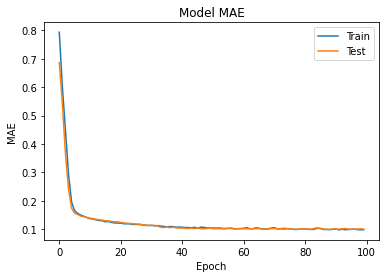

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

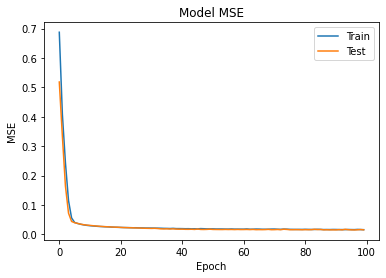

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

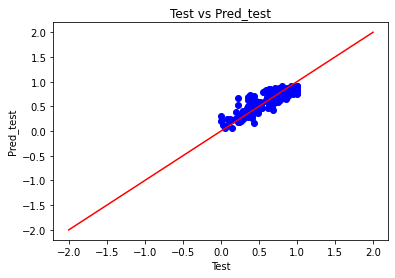

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

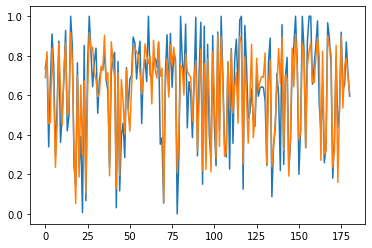

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

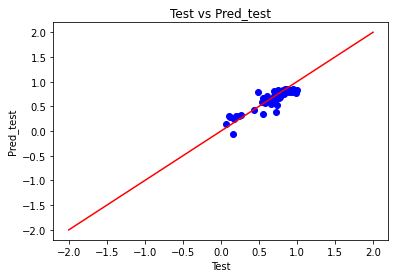

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

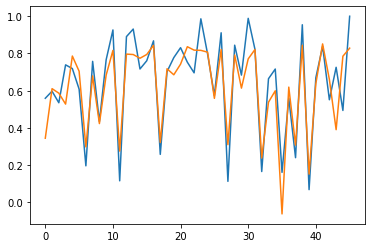

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.12645666300549727
0.12557018890210922


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9734606146812439, p = 0.0015803297283127904
Test k = 0.987483024597168, p = 0.8967553377151489


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9830003380775452, p_s = 0.007955360226333141
k_n = 12.23442264051411, p_n = 0.0022045953090086183


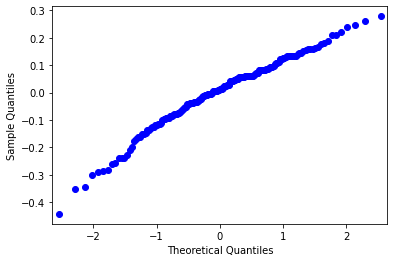

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

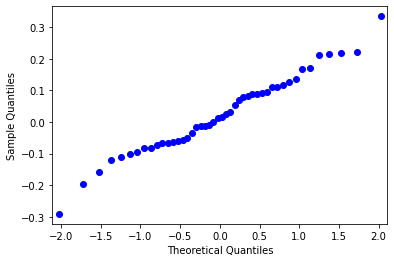

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

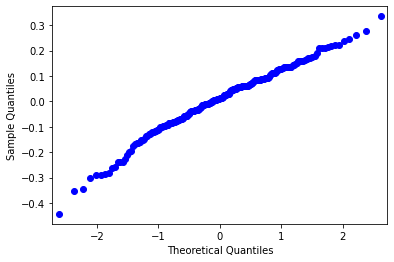

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

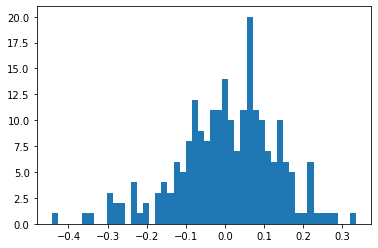

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')